In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_excel("Book11.xlsx", sheet_name = "Sheet2")

In [80]:
df.head()

,Weight(kg),Height(cm)
0,NaN,NaN
1,50.0,160.0
2,55.0,162.0
3,60.0,165.0
4,65.0,168.0


In [81]:
df.shape

(24, 2)

In [82]:
df.reset_index(drop=True, inplace=True)

In [83]:
print(df.index)

RangeIndex(start=0, stop=24, step=1)


In [84]:
df.head()

,Weight(kg),Height(cm)
0,NaN,NaN
1,50.0,160.0
2,55.0,162.0
3,60.0,165.0
4,65.0,168.0


In [85]:
df[df.isnull().any(axis=1)]

,Weight(kg),Height(cm)
0,NaN,NaN


In [86]:
df.drop(index = 0 , inplace = True)

In [87]:
df.head()

,Weight(kg),Height(cm)
1,50.0,160.0
2,55.0,162.0
3,60.0,165.0
4,65.0,168.0
5,70.0,170.0


# Check for Nan values

In [88]:
df.isnull().sum()

Weight(kg)    0
Height(cm)    0
dtype: int64

No missing values

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Weight(kg)  23 non-null     float64
 1   Height(cm)  23 non-null     float64
dtypes: float64(2)
memory usage: 500.0 bytes


In [90]:
df['Weight(kg)'] = df['Weight(kg)'].astype(int)
df['Height(cm)'] = df['Height(cm)'].astype(int)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Weight(kg)  23 non-null     int64
 1   Height(cm)  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight(kg),23.0,105.00000,33.911650,50.0,77.5,105.0,132.5,160.0
Height(cm),23.0,185.73913,15.857941,160.0,173.5,185.0,198.5,212.0


# Exploratory Data Analysis

In [93]:
df1 = df

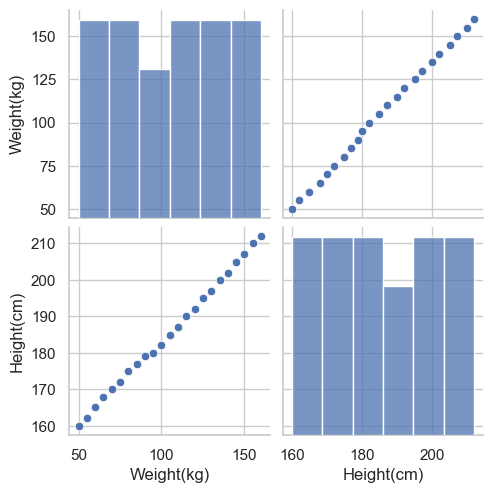

In [94]:
sns.pairplot(df1)

# Correlation 

In [95]:
df1.corr()

,Weight(kg),Height(cm)
Weight(kg),1.000000,0.999077
Height(cm),0.999077,1.000000


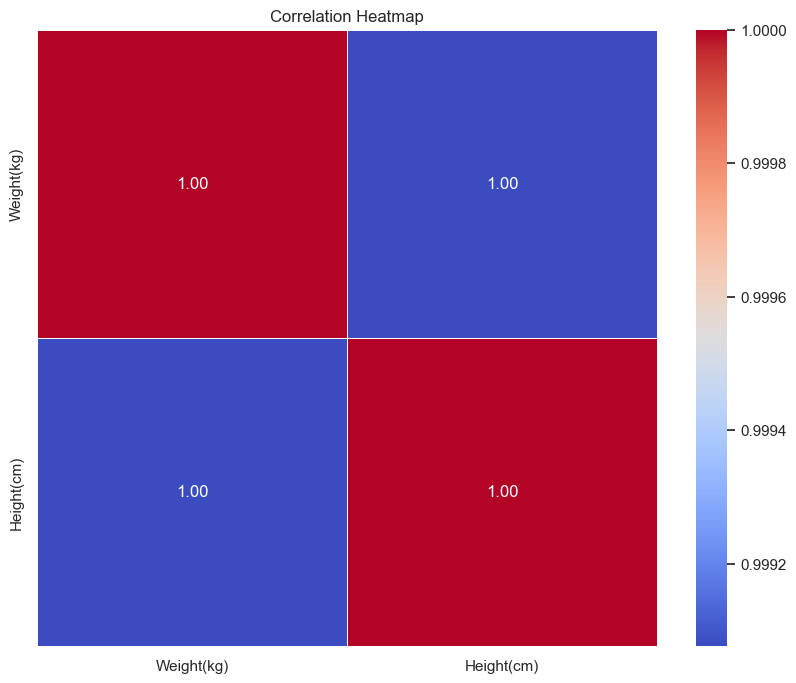

In [96]:
corr = df1.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))  # Optional: adjust the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

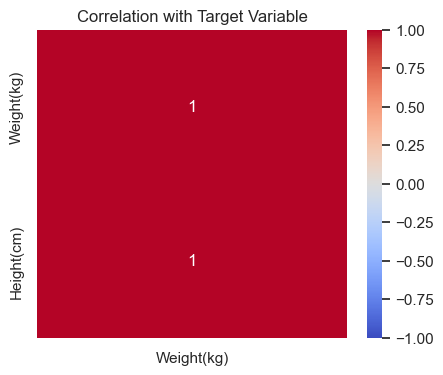

In [97]:
# Plot heatmap of correlations
corr_matrix = df1.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix[['Weight(kg)']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()

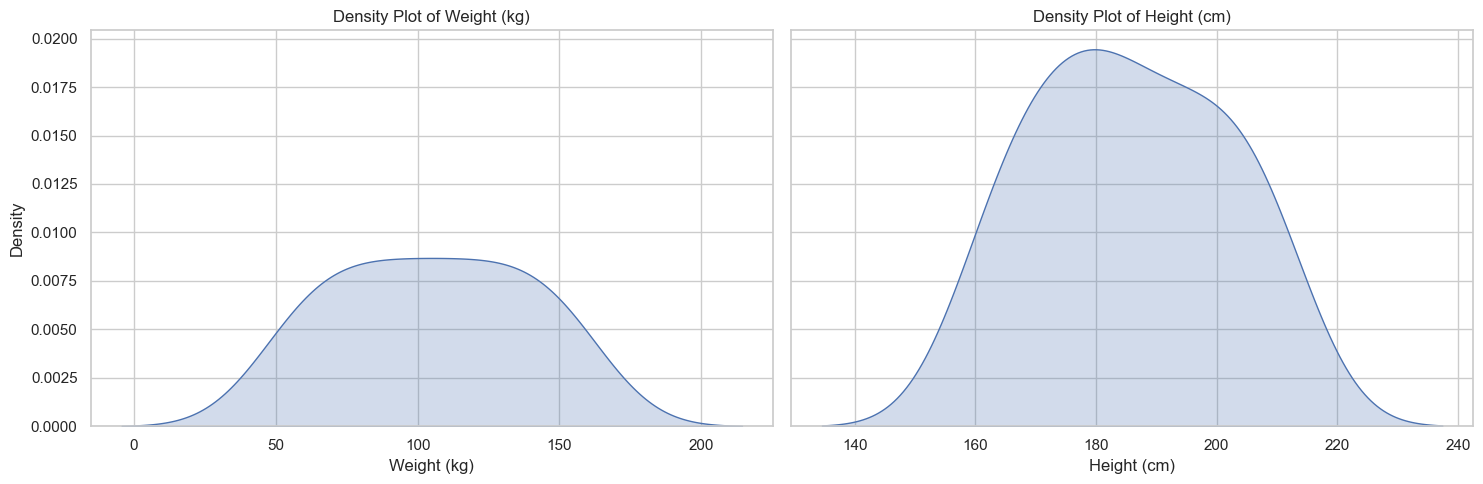

In [98]:
# Plot desnity plot for all feature
# Set the style to seaborn
sns.set(style="whitegrid")

# Plot density plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.kdeplot(df1['Weight(kg)'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot of Weight (kg)')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Density')

sns.kdeplot(df1['Height(cm)'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot of Height (cm)')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

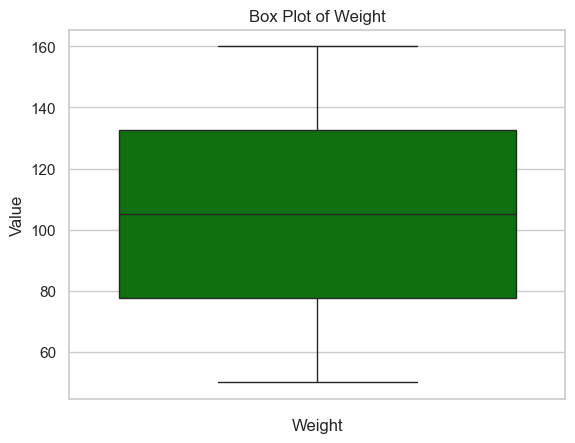

In [99]:
# Create the box plot
sns.boxplot(data=df1["Weight(kg)"], color="green")

# Customize the plot
plt.title('Box Plot of Weight')
plt.xlabel('Weight')
plt.ylabel('Value')

# Show the plot
plt.show()

# Model Training

In [100]:
x = df1.drop("Weight(kg)" , axis = 1)
y = df1["Height(cm)"]

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 42)

In [102]:
x.shape

(23, 1)

In [103]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17, 1), (6, 1), (17,), (6,))

# Feature Scaling Or Standardization

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

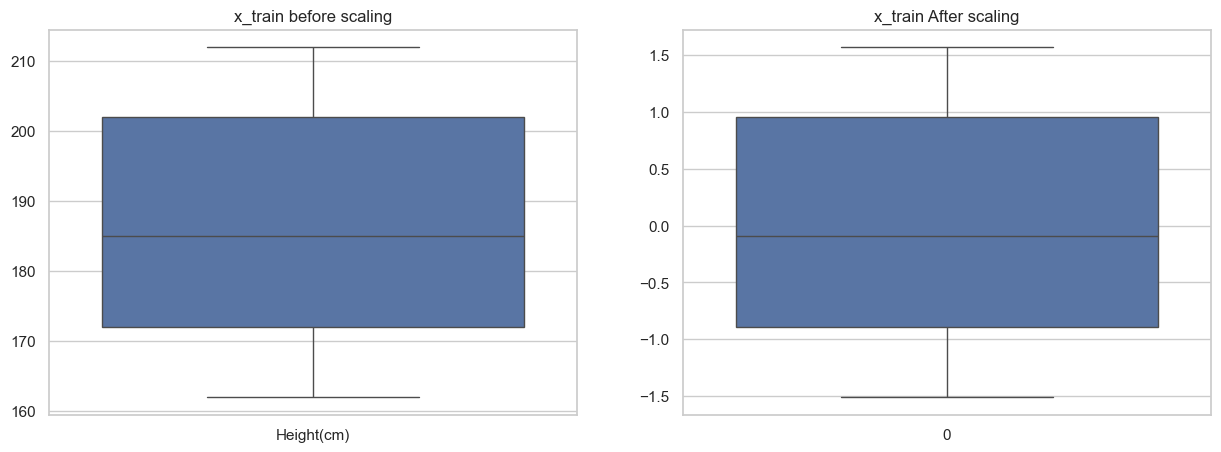

In [107]:
## Box Plot To Understand Effect of Standard Scaler
plt.figure(figsize=(15, 5))
# Create the first subplot
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
# Create the second subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train After scaling")
# Show the plot
plt.show()

# Linear Regression Model

MEAN ABSOLUTE ERROR 0.0
R2 SCORE 1.0


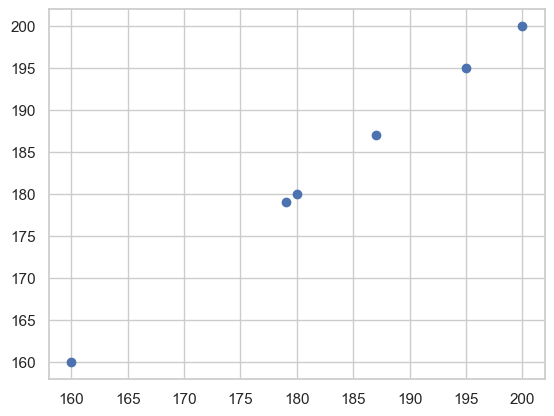

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model1 = LinearRegression()
model1.fit(x_train_scaled,y_train)
y_pred = model1.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred)

Linear graph means good graph

In [116]:
print("The Slope or coeffiecnet of Weight",model1.coef_)
print("The intercept of weight",model1.intercept_)

The Slope or coeffiecnet of Weight [16.25212257]
The intercept of weight 186.52941176470588


# Prediction of Train Data

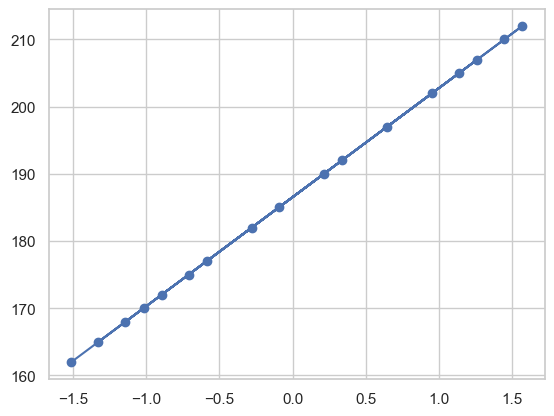

In [163]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled,model1.predict(x_train_scaled))

# Lasso Regression

MEAN ABSOLUTE ERROR 0.6460694569326743
R2 SCORE 0.9960058471257665


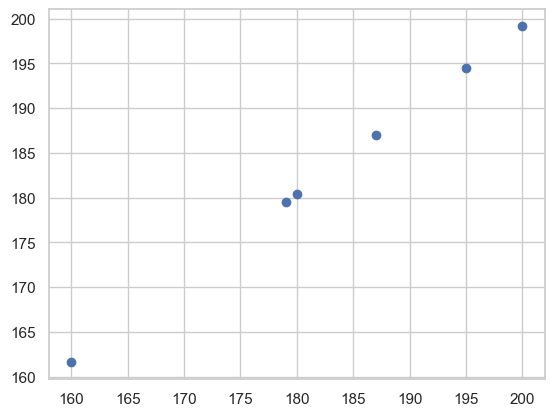

In [127]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled , y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred)

# Cross Validation Lasso

In [138]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 3)
lassocv.fit(x_train_scaled,y_train)


LassoCV(cv=3)

In [139]:
lassocv.predict(x_test_scaled)

array([194.99152941, 180.00652941, 160.02652941, 179.00752941,
       199.98652941, 186.99952941])

In [140]:
# Print the best alpha parameter found by cross-validation
print("Best alpha parameter:", lassocv.alpha_)

Best alpha parameter: 0.016252122565661182


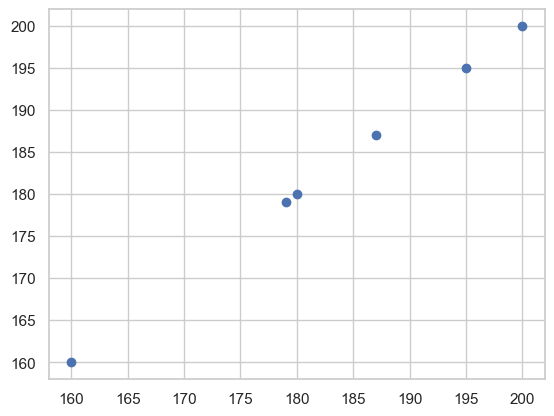

In [141]:
y_pred1 = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred1)

In [142]:
mae = mean_absolute_error(y_test,y_pred1)
score = r2_score(y_test,y_pred1)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)


MEAN ABSOLUTE ERROR 0.010500000000002766
R2 SCORE 0.9999989450184584


# Ridge Regression Model

MEAN ABSOLUTE ERROR 0.5833333333333334
R2 SCORE 0.9967438841310848


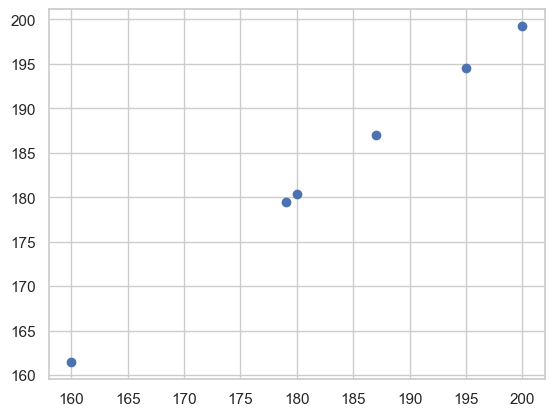

In [113]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled , y_train)
y_pred2 = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred2)
score = r2_score(y_test,y_pred2)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred2)

# RidgeCV

MEAN ABSOLUTE ERROR 0.06140350877194578
R2 SCORE 0.9999639211538071


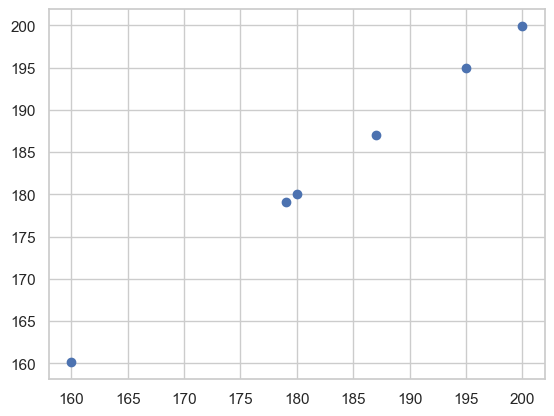

In [144]:
from sklearn.linear_model import RidgeCV
R= RidgeCV(cv = 5)
R.fit(x_train_scaled,y_train)
y_pred1 = R.predict(x_test_scaled)
plt.scatter(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
score = r2_score(y_test,y_pred1)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)

# ElasticNet Regression

MEAN ABSOLUTE ERROR 3.715356485644231
R2 SCORE 0.8679108201645737


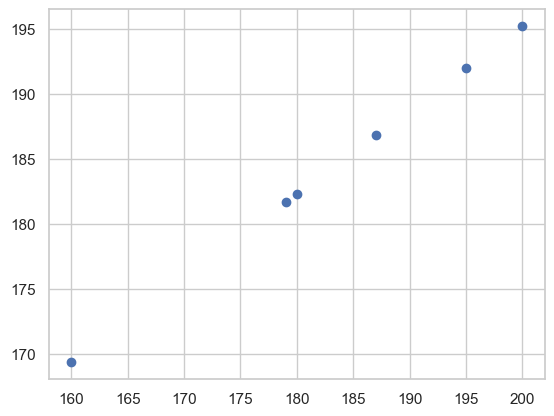

In [136]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic= ElasticNet()
elastic.fit(x_train_scaled , y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred)

# Elasticnet Cv

MEAN ABSOLUTE ERROR 0.1782503405573408
R2 SCORE 0.9996959626073525


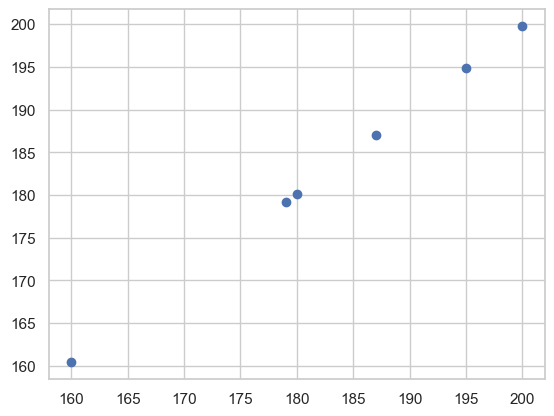

In [145]:
from sklearn.linear_model import ElasticNetCV
el= ElasticNetCV(cv = 5)
el.fit(x_train_scaled,y_train)
y_pred1 = el.predict(x_test_scaled)
plt.scatter(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
score = r2_score(y_test,y_pred1)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)

16    0.0
10    0.0
1     0.0
9     0.0
18    0.0
13    0.0
Name: Height(cm), dtype: float64


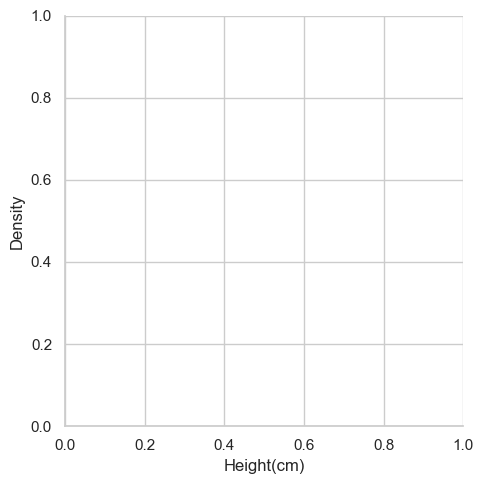

In [173]:
# Best FiT IS Ridge Regression
## pLOT Residuals
residuals = y_test-y_pred_test
print(residuals)
sns.displot(residuals, kind ="kde")


In [174]:
### if normal so best

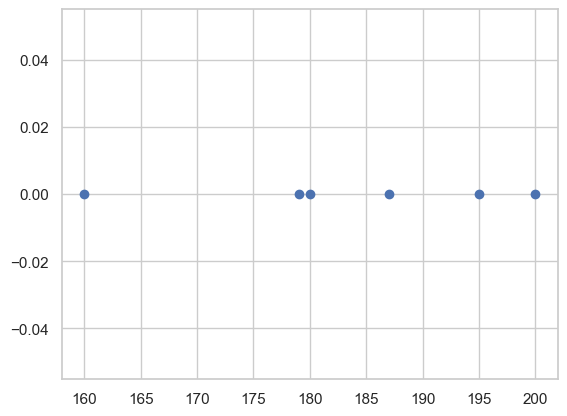

In [175]:
plt.scatter(y_pred_test,residuals)

### Prediction of Train Data
1. Predicted height output = intercept +coeff_(weight)
2. y_pred_train = 157.5 +17.03(x_train)
## Prediction of test data
1. Predicted hegight = intercept +coeff_(weight)
2. y_pred_test = 157.5+17.03(x_test)

In [153]:
y_pred_test = model1.predict(x_test_scaled)

In [154]:
y_pred_test,y_test

(array([195., 180., 160., 179., 200., 187.]),
 16    195
 10    180
 1     160
 9     179
 18    200
 13    187
 Name: Height(cm), dtype: int64)

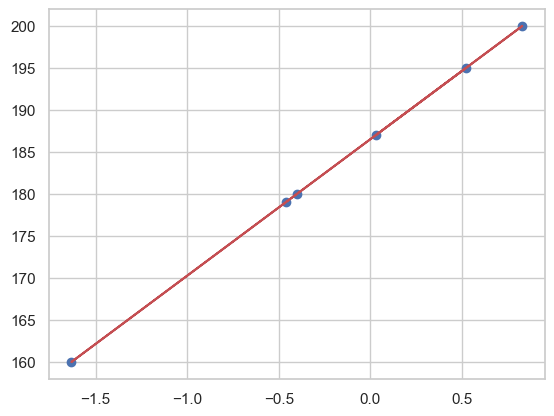

In [155]:
plt.scatter(x_test_scaled,y_test)
plt.plot(x_test_scaled,model1.predict(x_test_scaled),"r")

In [159]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print(mse)
print(mae)

0.0
0.0


In [160]:
score = r2_score(y_test,y_pred_test)
score

1.0

# New Data Point

In [165]:
weight = scaler.transform([[80]])
weight

array([[-6.55479992]])

In [169]:
print("The height prediction of weight 80kg will be",model1.predict([weight[0]]))

The height prediction of weight 80kg will be [80.]


# Assumptions to see your model  is best

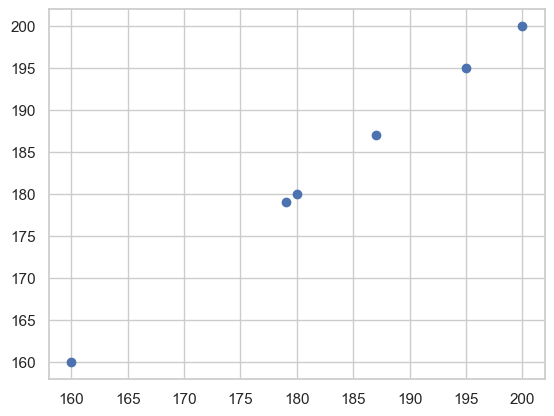

In [170]:
plt.scatter(y_test,y_pred_test)

In [171]:
# residuals

pickiling is last step

In [182]:
import pickle
model = pickle.dump(model1,open("model.pkl",'wb'))

In [185]:
model.predict(x_test_scaled)

AttributeError: 'NoneType' object has no attribute 'predict'